In [1]:
import uproot4 as upr
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import particle
import ROOT
import math
import numpy as np
import sys

Welcome to JupyROOT 6.20/00


In [2]:
sys.path.append('/storage/gpfs_data/neutrino/users/gi/sand-physics/notebook/python_tools')
from ROOT_tools import ROOT_tools
from MultiPlotter import MultiPlotter
from ROOT2Pandas import Converter
tool = ROOT_tools()

In [3]:
tool = ROOT_tools()

file_name = "/storage/gpfs_data/neutrino/users/gi/sand-physics/production_antinumucc/events-in-SANDtracker.0.to.1000.drift-reco.analysed.root"

tree_name = "tReco_extended"

converter = Converter(file_name, tree_name)

In [19]:
converter.keys()

['edep_file_input', 'digit_file_input', 'edep_event_index', 'Antimuon_pt_true', 'Antimuon_pt_reco', 'Antimuon_p_true', 'Antimuon_p_reco', 'Antimuon_ptot_true', 'Antimuon_ptot_reco', 'Antimuon_dip_true', 'Antimuon_dip_reco', 'Neutrino_reconstructed_P4_GeV', 'IncomingNeutrinoP4', 'PredictedNeutron_P3_GeV', 'FinalStateHadronicSystemTotal4Momentum']


In [4]:
columns = ['edep_file_input',
           'digit_file_input',
           'edep_event_index',
           'Antimuon_pt_true',
           'Antimuon_pt_reco',
           'Antimuon_p_true',
           'Antimuon_p_reco',
           'Antimuon_ptot_true',
           'Antimuon_ptot_reco',
           'Antimuon_dip_true',
           'Antimuon_dip_reco',
           'PredictedNeutron_P3_GeV',
           'FinalStateHadronicSystemTotal4Momentum']

In [6]:
df = converter.CreatePandas(
    columns = columns,
    rename = True,
    indices = ['edep_file_input','edep_event_index']
)

In [30]:
df

digit_file_input  \
                                                                                                                         
                                                                                                                         
edep_file_input                                    edep_event_index                                                      
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 46                /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   73                /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   114               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   128               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   134               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
...                                                                                                                ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 984               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   985               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   990               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   994               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   
                                                   998               /storage/gpfs_data/neutrino/users/gi/SAND-DRIF...   

                                                                    Antimuon_pt_true  \
                                                                                       
                                                                                       
edep_file_input                                    edep_event_index                    
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 46                    1191.317438   
                                                   73                    3255.871390   
                                                   114                   1268.757772   
                                                   128                   1630.233523   
                                                   134                    290.987857   
...                                                                              ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 984                   1741.073426   
                                                   985                   3164.072200   
                                                   990                   1552.906531   
                                                   994                   1629.192529   
                                                   998                    772.180211   

                                                                    Antimuon_pt_reco  \
                                                                                       
                                                                                       
edep_file_input                                    edep_event_index                    
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 46                      23.987645   
                                                   73                    3279.653198   
                                                   114                   1279.679933   
                                                   128                     38.010445   
                                                   134                     17.431890   
...                                                                              ...   
/storage/gpfs_data/neutrino/users/gi/SAND-DRIFT... 984                

In [9]:
df['Antimuon_ptot_residual'] = (1/df['Antimuon_ptot_true'] - 1/df['Antimuon_ptot_reco'])/(1/df['Antimuon_ptot_reco'])
df['Antimuon_pt_residual'] = (1/df['Antimuon_pt_true'] - 1/df['Antimuon_pt_reco'])/(1/df['Antimuon_pt_reco'])

 FCN=7595.29 FROM MIGRAD    STATUS=CONVERGED      71 CALLS          72 TOTAL
                     EDM=3.5256e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.24900e+03   1.55761e+01   4.74521e-01   9.84334e-06
   2  Mean        -8.05267e-03   5.43572e-05   2.30563e-06  -8.11540e+00
   3  Sigma        2.54777e-02   5.28929e-05   1.99486e-05  -8.59877e-01


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


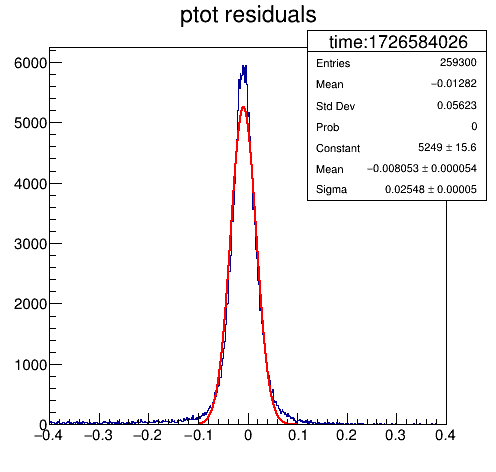

In [8]:
hist_ptot = tool.FillTH1D(iterable = df['ptot_residual'].dropna().values, 
                          histogram_name = "", 
                          title = "ptot residuals", 
                          nbins = int(np.sqrt(len(df))),
                          #  nbins = 30,
                          x_min = -0.4, 
                          x_max = 0.4)

hist_ptot, mean, sigma = tool.FitTH1D_w_gauss(hist = hist_ptot, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))

c = ROOT.TCanvas("canvas_name", "Canvas", 500, 500)
ROOT.gStyle.SetOptFit(1011)
hist_ptot.Draw()
c.Draw()

In [9]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists = [], []

# df_cut = df[(df.TMinuitFinalStatus==1)&(df.nof_digits>10)]
df_cut = df
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut.pt_true - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['pt_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)

250.0
energy range [0.0,500.0] : resolution 0.07435102383564197
750.0
energy range [500.0,1000.0] : resolution 0.05267494169538394
1250.0
energy range [1000.0,1500.0] : resolution 0.047175010320260675
1750.0
energy range [1500.0,2000.0] : resolution 0.04414996048362143
2250.0
energy range [2000.0,2500.0] : resolution 0.044848790243562316
2750.0
energy range [2500.0,3000.0] : resolution 0.04331356557791946
4000.0
energy range [3000.0,5000.0] : resolution 0.0430940728764321
6500.0
energy range [5000.0,8000.0] : resolution 0.042358224607246656
 FCN=140.731 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=8.27594e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.95724e+02   7.67571e+00   2.96131e-02   1.65943e-04
   2  Mean        -8.26660e-02   4.03835e-03   6.39780e-06   8.46611e-01
   3  

Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584027 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584027 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584027 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584027 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584027 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas_name


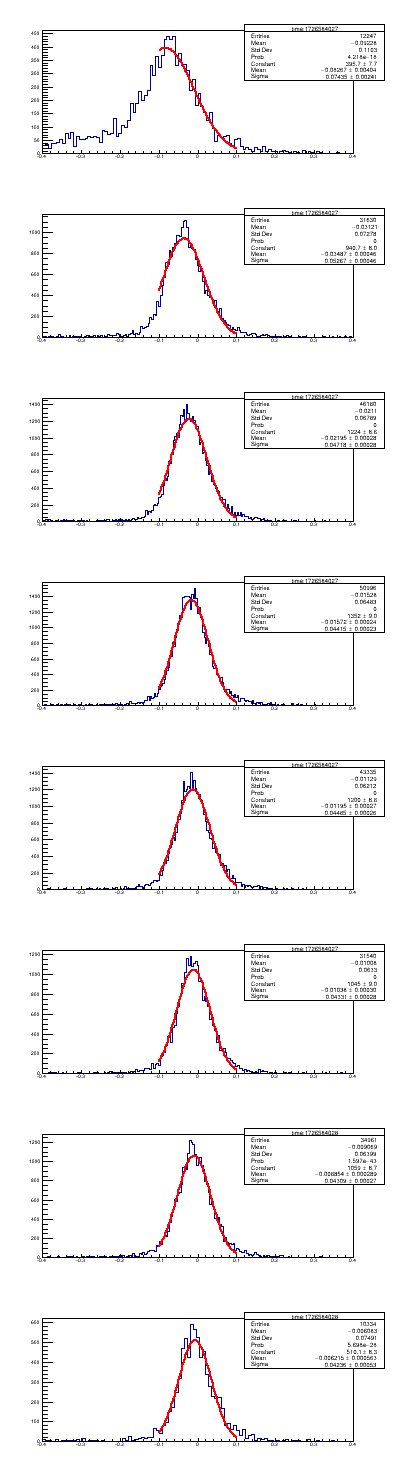

In [10]:
c = ROOT.TCanvas("canvas_name", "Canvas", 400, 1500)
ROOT.gStyle.SetOptFit(1011)
c.Divide(1,len(hists))
for i, hist in enumerate(hists):
    c.cd(i+1)
    hist.Draw()
c.Draw()

No handles with labels found to put in legend.


Text(0.5, 0.98, '$\\mu$ momentum (transverse to B) resolution')

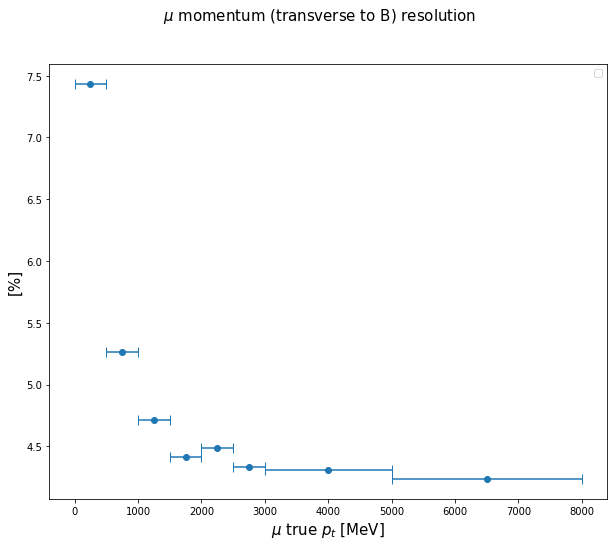

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 ,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true $p_t$ [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
# plt.xticks(np.arange(0,6,0.5))
# plt.yticks(np.arange(0.1,2,0.1))
plt.legend()
plt.suptitle(r"$\mu$ momentum (transverse to B) resolution", fontsize=15)

In [12]:
# centers, widths = equally_split_bins(df['pt_true'].values, nof_bins=10)
bin_edges  = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 5, 8])*1e3
centers = (bin_edges[1:]+bin_edges[:-1])/2
widths  = (bin_edges[1:]-bin_edges[:-1])

resolutions, hists = [], []

# df_cut = df[(df.TMinuitFinalStatus==1)&(df.nof_digits>10)]
df_cut = df
for pt, width in zip(centers, widths):
    # select all events in a give range of pt
    print(pt)
    df_inrange = df_cut[abs(df_cut.pt_true - pt) <= width/2]
    hist = tool.FillTH1D(iterable = df_inrange['ptot_residual'].values, 
                         histogram_name = "", 
                         title = "", 
                         nbins = int(np.sqrt(len(df_inrange))),
                        #  nbins = 30,
                         x_min = -0.4, 
                         x_max = 0.4)
    hist, mean, sigma = tool.FitTH1D_w_gauss(hist = hist, 
                                             gauss_range = (-0.2, 0.2), 
                                             fit_range = (-0.1,0.1))
    print(f"energy range [{pt - width/2},{pt + width/2}] : resolution {sigma}")
    hists.append(hist)
    resolutions.append(sigma)

250.0
energy range [0.0,500.0] : resolution 0.0476203025172346
750.0
energy range [500.0,1000.0] : resolution 0.027534061759850792
1250.0
energy range [1000.0,1500.0] : resolution 0.024992460649361937
1750.0
energy range [1500.0,2000.0] : resolution 0.023301885504657727
2250.0
energy range [2000.0,2500.0] : resolution 0.023615561939750642
2750.0
energy range [2500.0,3000.0] : resolution 0.023199020639853
4000.0
energy range [3000.0,5000.0] : resolution 0.023325984224624414
6500.0
energy range [5000.0,8000.0] : resolution 0.023794797331087403
 FCN=270.014 FROM MIGRAD    STATUS=CONVERGED      76 CALLS          77 TOTAL
                     EDM=7.07879e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.87481e+02   8.08299e+00   4.53005e-02   5.17656e-06
   2  Mean        -2.85608e-02   6.52489e-04   5.03845e-06  -1.15535e-02
   3 

Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1:  time:1726584028 (Potential memory leak).


No handles with labels found to put in legend.


Text(0.5, 1.0, '$\\mu$ momentum resolution')

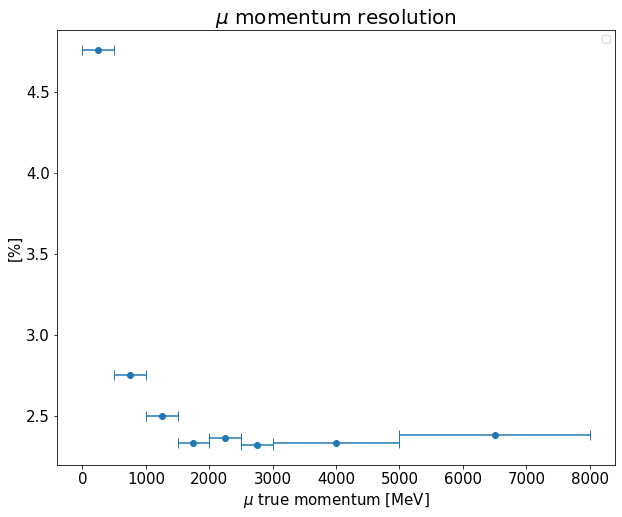

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
ax.errorbar(x=centers, y=np.array(resolutions)*1E2, xerr=np.array(widths)/2 ,fmt ='o',capsize=5)
plt.xlabel(r"$\mu$ true momentum [MeV]", fontsize=15)
plt.ylabel("[%]", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend()
plt.title(r"$\mu$ momentum resolution", fontsize=20)

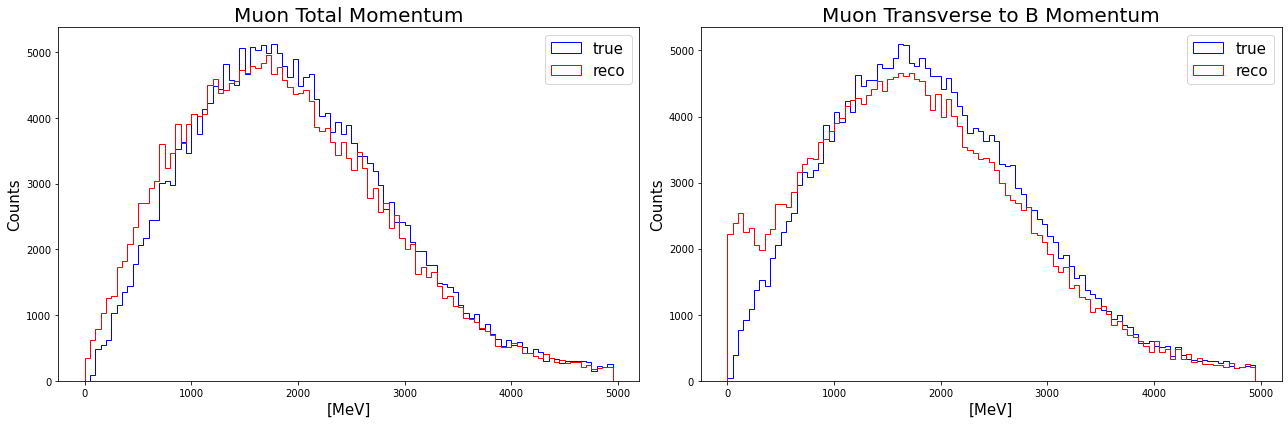

In [11]:
# Initialize the MultiPlotter with 2 subplots in a row
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(18, 6))

# Plot the first subplot
plotter.plot_hist(
    data=df.dropna()['Antimuon_ptot_true'],
    bins=np.arange(0, 5000, 50),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=df.dropna()['Antimuon_ptot_reco'],
    bins=np.arange(0, 5000, 50),
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)

plotter.axes[0].set_title("Muon Total Momentum", fontsize=20)
plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()

# Plot the second subplot
plotter.plot_hist(
    data=df.dropna()['Antimuon_pt_true'],
    bins=np.arange(0, 5000, 50),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=df.dropna()['Antimuon_pt_reco'],
    bins=np.arange(0, 5000, 50),
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)
plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)
plotter.axes[1].set_title("Muon Transverse to B Momentum", fontsize=20)
plotter.add_legend(labels=["true", "reco"])

# Show the plots
plotter.show()

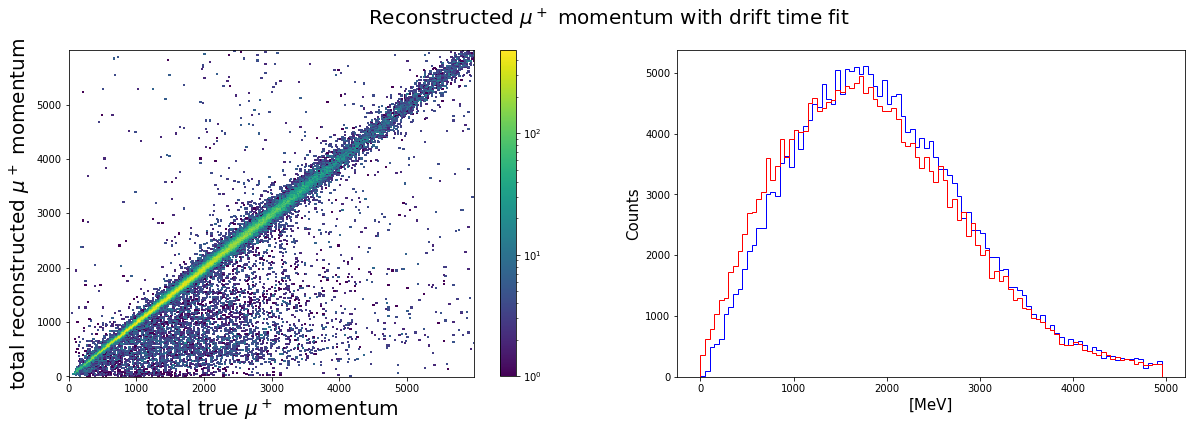

In [15]:
# Initialize the MultiPlotter with 1 subplot (8x8)
plotter = MultiPlotter(nrows=1, ncols=2, figsize=(20, 6), suptitle=r"Reconstructed $\mu^+$ momentum with drift time fit")

# Plot the 2D histogram
plotter.plot_hist2d(
    x=df['Antimuon_ptot_true'],
    y=df['Antimuon_ptot_reco'],
    bins_x=np.arange(-1, 6000, 20),
    bins_y=np.arange(-1, 6000, 20),
    xlabel=r"total true $\mu^+$ momentum",
    ylabel=r"total reconstructed $\mu^+$ momentum",
    log_scale=True
)

ax = plotter.axes[plotter.current_ax]
# ax.plot([-1, 6000], [-1, 6000], linestyle='-', color='red')

# Set the title
# plotter.axes[0].set_title(r"Reconstructed $\mu^+$ momentum with drift time fit", fontsize=20)
# plotter.add_legend(labels=["true", "reco"])
plotter.next_plot()

plotter.plot_hist(
    data=df.dropna()['Antimuon_ptot_true'],
    bins=np.arange(0, 5000, 50),
    label='true',
    color='blue'
)

plotter.plot_hist(
    data=df.dropna()['Antimuon_ptot_reco'],
    bins=np.arange(0, 5000, 50),
    label='reco',
    color='red',
    xlabel="[MeV]",
    ylabel="Counts"
)

plotter.set_labels(
    xlabel="[MeV]",
    ylabel="Counts",
    fontsize=15
)


Text(0.5, 0, 'pz_true - pz_reco [MeV]')

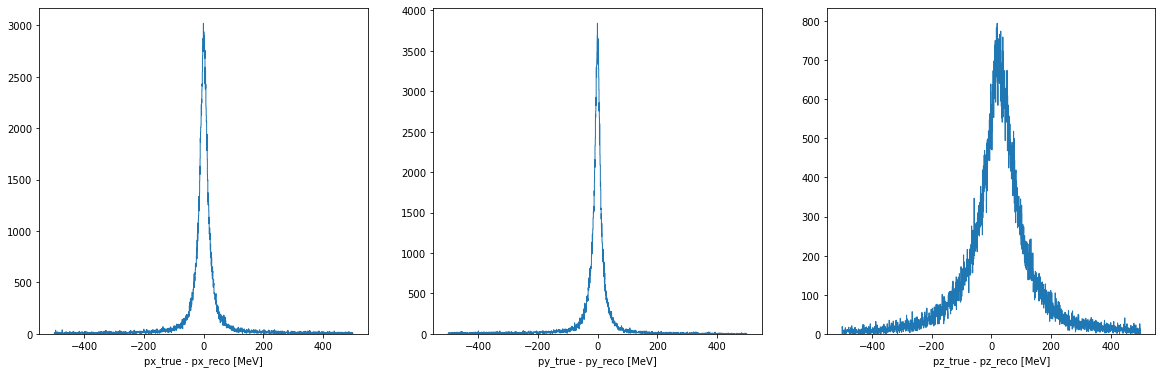

In [13]:
fig,ax = plt.subplots(1,3, figsize=(20,6))

ax[0].hist(x=df['p_truefX']-df['p_recofX'], histtype='step', bins=np.arange(-500,500,0.5))
ax[1].hist(x=df['p_truefY']-df['p_recofY'], histtype='step', bins=np.arange(-500,500,0.5))
ax[2].hist(x=df['p_truefZ']-df['p_recofZ'], histtype='step', bins=np.arange(-500,500,0.5))

ax[0].set_xlabel("px_true - px_reco [MeV]")
ax[1].set_xlabel("py_true - py_reco [MeV]")
ax[2].set_xlabel("pz_true - pz_reco [MeV]")

In [28]:
df.columns

MultiIndex([(                      'digit_file_input',   '',   ''),
            (                      'Antimuon_pt_true',   '',   ''),
            (                      'Antimuon_pt_reco',   '',   ''),
            (                     'Antimuon_p_truefX',   '',   ''),
            (                     'Antimuon_p_truefY',   '',   ''),
            (                     'Antimuon_p_truefZ',   '',   ''),
            (                     'Antimuon_p_recofX',   '',   ''),
            (                     'Antimuon_p_recofY',   '',   ''),
            (                     'Antimuon_p_recofZ',   '',   ''),
            (                    'Antimuon_ptot_true',   '',   ''),
            (                    'Antimuon_ptot_reco',   '',   ''),
            (                     'Antimuon_dip_true',   '',   ''),
            (                     'Antimuon_dip_reco',   '',   ''),
            (             'PredictedNeutron_P3_GeVfX',   '',   ''),
            (             'PredictedNeutron_P3_G